# Présentation du projet Twitter us airline sentiment (NLP)

Le but est de connaître les sentiments des personnes par leurs tweets envers les compagnies aériennes américaines. 
Les données de Twitter ont été extraites de février 2015 et les contributeurs ont été invités à classer les tweets positifs, négatifs et neutres, puis à catégoriser les raisons négatives (telles que "vol tardif" ou "service dur").
La base de données indique si le sentiment des tweets de cet ensemble était positif, neutre ou négatif pour six compagnies aériennes américaines (Delta, Southwest, united, US airways, Virgin america, American,)

# Recuperer les tweets et préparation des données

In [1]:
import pandas as pd #Importation des données

In [2]:
Data = pd.read_csv("Tweets.csv")

In [3]:
Data.tail(n=7) #Affiche 7 dernières colonne 
Data.head(n=5) #Affiche 5 première lignes

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [239]:
Data.columns #Affichage colonnes
Data.info() #Affichage colonnes + nombres de données + types de données 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [240]:
Data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [241]:
Tweet = Data.text
Tweet #Affiche Serie de Tweet

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [242]:
for i in Tweet:
    print(i) #test : affichage tweet

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it
@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP
@virginamerica Well, I didn't…but NOW I DO! :-D
@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.
@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D
@V

@united -How is it that all my flight times were changed without any official notification? Almost missed my flight this morning. Not cool!
@united they had record of it being at Denver on the concourse prior to me gettin on the shuttle. I just want to confirm its location
@united #LAX #sunrise UAL212 LAX-JFK
@united ...would be on the next flight to Hayden/steamboat
@united we needed to be at steamboat for a meeting by 3pm so we took a shuttle. The United customer service people said the bag would be on
@united, there is no good word for describing how angry and pissed off of a customer you have made me.
@united Late Flight 2014 and 2015 are huge step towards decline in service, and your agents, not all, are as arrogant as ever.  #UnitedAirlines
@united Denver baggage handlers you totally impressed us today. Our lungs barely made the run to connect but our bags had no problem! #DEN
@united flight 3870 to Newark, stuck in the runway. About to miss my connection and they are just sorry 

@united accordingly? U dont respond at all
@united "the extra care airline". #unitedairlines they don't care. Trust me. There #customerservice is non existent. They don't have 1
@united Another unfortunate case of bad luck, usually maintenance issue. They are now swapping planes to ONT, will get in Late Flight. :(
@united it's a shame the great customer service wasn't continued in SFO. Slightly absurd
@united #onlyinAmerica. 18 days and not a word from #unitedairlines #customerservices. Bad PR guys.
@united still awaiting a reply from ur customer services?  18 days, no response? Lousy #unitedairlines
@united alright thank you. Much appreciated.
@united has happened on other airlines and they've given out flight vouchers and been more transparent about the problems.
@united thanks, I'm booked. Just spent an extra 7 hrs in the TEN w/ no explanation. Now flying middle seat to CHAR instead of Memphis.
@united agent Rick Clifton in SEA-HOU , told him my father is dying and needed to get my 

@SouthwestAir prove it, Cuz the southwest people here don't even know why it's behind schedule.
@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!
@SouthwestAir u were bae until u lost both of my bags and had no clue where they were or what happened to them for 36 hours :/
@SouthwestAir prove it
@SouthwestAir Travel agent Darrel here at Love Field hosting a paper airplane contest to entertain all the children was so awesome to see!
@SouthwestAir Big kudos to your staff today at Dallas Love Field for lifting everyone's spirits today with all the delays and Cancelled Flightlations
@SouthwestAir it's not fun having a delay from Nashville to Las Vegas, but the crew at the gate C9 desk has been AWESOME! #patience #luvswa
@SouthwestAir thinks that a $100 voucher makes up for spending 4 hrs on a plane and landing at the same airport we took off from. Really?
Never got to the strip that fast before. Stoked for special @I

@SouthwestAir - Great flight from Phoenix to Dallas tonight!Great service and ON TIME! Makes @timieyancey very happy! http://t.co/TkVCMhbPim
@SouthwestAir flight Cancelled Flighted tonight and was told I won't receive a travel voucher for the inconvenience. Is that really your policy?
@SouthwestAir you guys are so clever 😃 http://t.co/qn5odUGFqK
@SouthwestAir I fly SWA a lot - ALWAYS purchase EB and NEVER past A30... Rethinking the SWA process.  Very misleading.
@southwestair Amazing view on the approach to LAX tonight. http://t.co/a68d5fULmH
@SouthwestAir today you sporadically changed my flight departure 5 times &amp; left two hours Late Flight. Uncharacteristic of u http://t.co/TXhYJ40llG
@SouthwestAir, I really appreciate you all's #BHM commercial that aired today during @BET's #BookofNegroes
@SouthwestAir do new flights come out at midnight?
@SouthwestAir Looks like 'On February 19, 2015, we will open our schedule for sale through October 30, 2015' - know what time that will be?
@

@JetBlue your app needs updating. Says my flight is on time when we are well past boarding time with 2hr delay http://t.co/BTvpxTZJu0
@JetBlue do bags still fly free or have you started charging? thanks!
@JetBlue had a great experience working with Glenn Coles at Buffalo-Niagara Airport!! Top notch employee
@JetBlue well, the last update was in the right direction, at least! I'll keep my fingers crossed.
@JetBlue Charleston - from your app guys as of a few minutes ago!!! http://t.co/sEUlpvfn95
@JetBlue thx, social media person!
@JetBlue Are there airport-wide delays at BOS or did we just get unlucky with 152?
@JetBlue Just left #LaGuardia now...#Sunshine in a little over 2 hours
@JetBlue I hear you and safety is #1! I think we can get to JFK though now so let's help the pilots, passengers &amp; crew get there safely!
@JetBlue is JFK still closed? Tryna get out of Ft Lauderdale on flight 502, just want to get home to nyc!
@JetBlue woulda been nice of you to let us know that or post it!!

@USAirways they have all of this at hotels. Still don't have my work folder or business casual clothes. #worst http://t.co/JIEYCat1Ek
@USAirways oh I got right through to an agent. They just kept putting me on hold and still didn't fix the problem
@USAirways There is no reFlight Booking Problems the event I'm flying to attend. Waiting for jetway driver??? STILL ON TARMAC???
@USAirways Baggage Team? Recording tells me my bag still hasn't been found. And delayed baggage link on web conveniently not working. #worst
@USAirways been trying for weeks no use
@USAirways should give me free baggage for this mess
@USAirways Gate traffic #DCA, MY flight arrived 20 early,connecting flight 2139 leaving in 23 minutes. Several of us stuck. HOLD THAT PLANE.
@USAirways I really feel like your company needs evaluate their policies &amp; realize that transfers should be possible for tickets
@USAirways I know this is probably a no but is there a way to get a cheaper airfare ticket if the flight is leaving

@USAirways on hold for 1hr, 30min. Not willing to hang in there as long as @franchise02. @AmericanAir answered in 7 min. U are not 1 yet.
@USAirways what's the point of email stating I didn't get bumped to 1st class? I know I'm not in first class, I booked the regular ticket
@USAirways 2 hours and 7 minutes. Just want to know I'm still in the queue...
@USAirways check in at St. Louis is so rude, even the TSA is nicer than them.
@USAirways so disappointed. Least you could do is give us access to admirals club for an hour before our flight to our wedding!
@USAirways paid to upgrade to first class, went up to Admirals club at PHX airport to be turned away because our flight is to CUN and not MC
@USAirways can you please post wait time-have been on hold for two hours
@USAirways Saying my friend missed her flight when she clearly sat next to me on the plane &amp; now you're Cancelled Flighting her flight home.. WTF!?
@USAirways or is anyone even responding to social media? AWFUL.
@USAirways

@AmericanAir I tried to book a rwrd and was told I couldnt. Bought tix on USAir (now AA-no choice) didn't bother to + AAdv# with this svc...
@AmericanAir did you know that suicide is the second leading cause of death among teens 10-24?
@AmericanAir narrowly made standby...lots of snags this trip!
@AmericanAir @pbpinftworth iPhone 6 64GB (not 6 plus)
@AmericanAir i ordered it as i always do. But on a 9hour flight delayed for 4 hours, it was worse than ever before when you forgot my meal.
@AmericanAir thanks so much!
@AmericanAir @RobertDwyer AA doesnt charge any fees to change award tickets as long as the origin, destination &amp; award type remains the same
@AmericanAir I need a flight out tonight. Isn't there anything else?
@AmericanAir thank you for the confirmation.
@AmericanAir spent $8 for the choppiest feed of "Whiplash" ever. #americanairlinesfail #iwantmymoneyback
@AmericanAir OK I will call them likely tmrw UK time to question the process getting the change charge reversed due

@AmericanAir Thanks guys, you got it. I'm heading to Milan on Wednesday, so big week with the AA family :)
@AmericanAir 953 our  fligth Somthing to talk  about this?
@AmericanAir interested in possibly changing my flight to another day...need to see if there are any fees but your number is busy
@AmericanAir I understand you are busy but I have still gotten no answer. I need to get home and you guys have not helped at all
@AmericanAir No I do not have them yet. Called for baggage status 5 times yesterday.
@AmericanAir thanks. They did not charge anything in the end so all is good.
@AmericanAir @USAirways wonderful FC FA on flight 2062 pre dawn!  Nice start to the day!
@AmericanAir been on hold for for over two hours. After waiting 2 hours earlier. Can't get any info on my reservation. How is that ok?
@AmericanAir @nickcunningham1 Except now there is no wait time, the phone system just hangs up on you. So continuing to hold won't help.
@AmericanAir LGA already by the time we pulled from 

In [243]:
tweets = [i.lower() for i in Tweet]

In [244]:
tweets

['@virginamerica what @dhepburn said.',
 "@virginamerica plus you've added commercials to the experience... tacky.",
 "@virginamerica i didn't today... must mean i need to take another trip!",
 '@virginamerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@virginamerica and it's a really big bad thing about it",
 "@virginamerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying va",
 '@virginamerica yes, nearly every time i fly vx this “ear worm” won’t go away :)',
 '@virginamerica really missed a prime opportunity for men without hats parody, there. https://t.co/mwpg7grezp',
 "@virginamerica well, i didn't…but now i do! :-d",
 "@virginamerica it was amazing, and arrived an hour early. you're too good to me.",
 '@virginamerica did you know that suicide is the second leading cause of death among teens 10-24',
 '@virginamerica i &lt;3 pretty graphic

# Nettoyage données

In [245]:
str_tweets = ' '.join(tweets) #La méthode de chaîne join () renvoie une chaîne en joignant tous les éléments d'un itérable, séparés par un séparateur de chaîne.
str_tweets

'@virginamerica what @dhepburn said. @virginamerica plus you\'ve added commercials to the experience... tacky. @virginamerica i didn\'t today... must mean i need to take another trip! @virginamerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @virginamerica and it\'s a really big bad thing about it @virginamerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying va @virginamerica yes, nearly every time i fly vx this “ear worm” won’t go away :) @virginamerica really missed a prime opportunity for men without hats parody, there. https://t.co/mwpg7grezp @virginamerica well, i didn\'t…but now i do! :-d @virginamerica it was amazing, and arrived an hour early. you\'re too good to me. @virginamerica did you know that suicide is the second leading cause of death among teens 10-24 @virginamerica i &lt;3 pretty graphics. so much better than minimal iconogr

In [246]:
import snowballstemmer #Réduire les différence grammaticales

stemmer = snowballstemmer.stemmer('english')
s = stemmer.stemWords(str_tweets.split())
print(s)

['@virginamerica', 'what', '@dhepburn', 'said.', '@virginamerica', 'plus', "you'v", 'ad', 'commerci', 'to', 'the', 'experience...', 'tacky.', '@virginamerica', 'i', "didn't", 'today...', 'must', 'mean', 'i', 'need', 'to', 'take', 'anoth', 'trip!', '@virginamerica', 'it', 'realli', 'aggress', 'to', 'blast', 'obnoxi', '"entertainment"', 'in', 'your', 'guest', 'face', '&amp;', 'they', 'have', 'littl', 'recours', '@virginamerica', 'and', 'it', 'a', 'realli', 'big', 'bad', 'thing', 'about', 'it', '@virginamerica', 'serious', 'would', 'pay', '$30', 'a', 'flight', 'for', 'seat', 'that', "didn't", 'have', 'this', 'playing.', 'it', 'realli', 'the', 'onli', 'bad', 'thing', 'about', 'fli', 'va', '@virginamerica', 'yes,', 'near', 'everi', 'time', 'i', 'fli', 'vx', 'this', '“ear', 'worm”', 'won’t', 'go', 'away', ':)', '@virginamerica', 'realli', 'miss', 'a', 'prime', 'opportun', 'for', 'men', 'without', 'hat', 'parody,', 'there.', 'https://t.co/mwpg7grezp', '@virginamerica', 'well,', 'i', "didn't…b

In [247]:
str_tweets = ' '.join(s)

In [248]:
import nltk #Traitement de langage
nltk.word_tokenize(str_tweets) #créer une liste dont les virgules séparents les mots et ponctuations

['@',
 'virginamerica',
 'what',
 '@',
 'dhepburn',
 'said',
 '.',
 '@',
 'virginamerica',
 'plus',
 "you'v",
 'ad',
 'commerci',
 'to',
 'the',
 'experience',
 '...',
 'tacky',
 '.',
 '@',
 'virginamerica',
 'i',
 'did',
 "n't",
 'today',
 '...',
 'must',
 'mean',
 'i',
 'need',
 'to',
 'take',
 'anoth',
 'trip',
 '!',
 '@',
 'virginamerica',
 'it',
 'realli',
 'aggress',
 'to',
 'blast',
 'obnoxi',
 '``',
 'entertainment',
 "''",
 'in',
 'your',
 'guest',
 'face',
 '&',
 'amp',
 ';',
 'they',
 'have',
 'littl',
 'recours',
 '@',
 'virginamerica',
 'and',
 'it',
 'a',
 'realli',
 'big',
 'bad',
 'thing',
 'about',
 'it',
 '@',
 'virginamerica',
 'serious',
 'would',
 'pay',
 '$',
 '30',
 'a',
 'flight',
 'for',
 'seat',
 'that',
 'did',
 "n't",
 'have',
 'this',
 'playing',
 '.',
 'it',
 'realli',
 'the',
 'onli',
 'bad',
 'thing',
 'about',
 'fli',
 'va',
 '@',
 'virginamerica',
 'yes',
 ',',
 'near',
 'everi',
 'time',
 'i',
 'fli',
 'vx',
 'this',
 '“',
 'ear',
 'worm',
 '”',
 'won

In [249]:
tok_tweet = nltk.RegexpTokenizer(r'\w+').tokenize(str_tweets)
tok_tweet

['virginamerica',
 'what',
 'dhepburn',
 'said',
 'virginamerica',
 'plus',
 'you',
 'v',
 'ad',
 'commerci',
 'to',
 'the',
 'experience',
 'tacky',
 'virginamerica',
 'i',
 'didn',
 't',
 'today',
 'must',
 'mean',
 'i',
 'need',
 'to',
 'take',
 'anoth',
 'trip',
 'virginamerica',
 'it',
 'realli',
 'aggress',
 'to',
 'blast',
 'obnoxi',
 'entertainment',
 'in',
 'your',
 'guest',
 'face',
 'amp',
 'they',
 'have',
 'littl',
 'recours',
 'virginamerica',
 'and',
 'it',
 'a',
 'realli',
 'big',
 'bad',
 'thing',
 'about',
 'it',
 'virginamerica',
 'serious',
 'would',
 'pay',
 '30',
 'a',
 'flight',
 'for',
 'seat',
 'that',
 'didn',
 't',
 'have',
 'this',
 'playing',
 'it',
 'realli',
 'the',
 'onli',
 'bad',
 'thing',
 'about',
 'fli',
 'va',
 'virginamerica',
 'yes',
 'near',
 'everi',
 'time',
 'i',
 'fli',
 'vx',
 'this',
 'ear',
 'worm',
 'won',
 't',
 'go',
 'away',
 'virginamerica',
 'realli',
 'miss',
 'a',
 'prime',
 'opportun',
 'for',
 'men',
 'without',
 'hat',
 'parody

On a enlevé les ponctuations et les caractéres spéciaux dans notre liste.

In [251]:
from nltk.corpus import stopwords #Enlever les mots vides
stopwords_list = stopwords.words('english')
clean_words = [word for word in tok_tweet if word not in stopwords_list] #Suppression des mots vides

In [252]:
clean_words

['virginamerica',
 'dhepburn',
 'said',
 'virginamerica',
 'plus',
 'v',
 'ad',
 'commerci',
 'experience',
 'tacky',
 'virginamerica',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'anoth',
 'trip',
 'virginamerica',
 'realli',
 'aggress',
 'blast',
 'obnoxi',
 'entertainment',
 'guest',
 'face',
 'amp',
 'littl',
 'recours',
 'virginamerica',
 'realli',
 'big',
 'bad',
 'thing',
 'virginamerica',
 'serious',
 'would',
 'pay',
 '30',
 'flight',
 'seat',
 'playing',
 'realli',
 'onli',
 'bad',
 'thing',
 'fli',
 'va',
 'virginamerica',
 'yes',
 'near',
 'everi',
 'time',
 'fli',
 'vx',
 'ear',
 'worm',
 'go',
 'away',
 'virginamerica',
 'realli',
 'miss',
 'prime',
 'opportun',
 'men',
 'without',
 'hat',
 'parody',
 'https',
 'co',
 'mwpg7grezp',
 'virginamerica',
 'well',
 'virginamerica',
 'amazing',
 'arriv',
 'hour',
 'early',
 'r',
 'good',
 'virginamerica',
 'know',
 'suicid',
 'second',
 'lead',
 'caus',
 'death',
 'among',
 'teen',
 '10',
 '24',
 'virginamerica',
 'lt',
 '3',

On a enlevé les mots vides dans notre liste (What, to, the...) car ils n'auront pas d'impact dans notre résultat de prédiction et on aura moins de données en entrée.

In [253]:
Compagnie = [ "united", "usairway", "americanair", "southwestair", "sdelta", "virginamerica"] #Affichage des compagnies

Le nom des compagnies aériennes peuvent également être supprimées en entrée.

In [254]:
new_clean_words = [i for i in clean_words if i not in Compagnie] #Affichages mots sans les compagnies
new_clean_words

['dhepburn',
 'said',
 'plus',
 'v',
 'ad',
 'commerci',
 'experience',
 'tacky',
 'today',
 'must',
 'mean',
 'need',
 'take',
 'anoth',
 'trip',
 'realli',
 'aggress',
 'blast',
 'obnoxi',
 'entertainment',
 'guest',
 'face',
 'amp',
 'littl',
 'recours',
 'realli',
 'big',
 'bad',
 'thing',
 'serious',
 'would',
 'pay',
 '30',
 'flight',
 'seat',
 'playing',
 'realli',
 'onli',
 'bad',
 'thing',
 'fli',
 'va',
 'yes',
 'near',
 'everi',
 'time',
 'fli',
 'vx',
 'ear',
 'worm',
 'go',
 'away',
 'realli',
 'miss',
 'prime',
 'opportun',
 'men',
 'without',
 'hat',
 'parody',
 'https',
 'co',
 'mwpg7grezp',
 'well',
 'amazing',
 'arriv',
 'hour',
 'early',
 'r',
 'good',
 'know',
 'suicid',
 'second',
 'lead',
 'caus',
 'death',
 'among',
 'teen',
 '10',
 '24',
 'lt',
 '3',
 'pretti',
 'graphics',
 'much',
 'better',
 'minim',
 'iconography',
 'great',
 'deal',
 'alreadi',
 'think',
 '2nd',
 'trip',
 'australia',
 'amp',
 'even',
 'gone',
 '1st',
 'trip',
 'yet',
 'p',
 'virginmedia',


# Frequence de mots

In [255]:
from collections import Counter #compte la fréquence des mots
counts = Counter(new_clean_words)
counts

Counter({'dhepburn': 1,
         'said': 180,
         'plus': 58,
         'v': 488,
         'ad': 45,
         'commerci': 11,
         'experience': 45,
         'tacky': 1,
         'today': 433,
         'must': 36,
         'mean': 90,
         'need': 676,
         'take': 376,
         'anoth': 269,
         'trip': 231,
         'realli': 239,
         'aggress': 3,
         'blast': 6,
         'obnoxi': 2,
         'entertainment': 8,
         'guest': 7,
         'face': 20,
         'amp': 683,
         'littl': 67,
         'recours': 3,
         'big': 72,
         'bad': 192,
         'thing': 123,
         'serious': 50,
         'would': 561,
         'pay': 184,
         '30': 182,
         'flight': 4672,
         'seat': 461,
         'playing': 1,
         'onli': 329,
         'fli': 655,
         'va': 10,
         'yes': 241,
         'near': 28,
         'everi': 115,
         'time': 923,
         'vx': 7,
         'ear': 2,
         'worm': 1,
         'go'

Text(0.5,1,'Most Common Words used by Edgar Allen Poe')

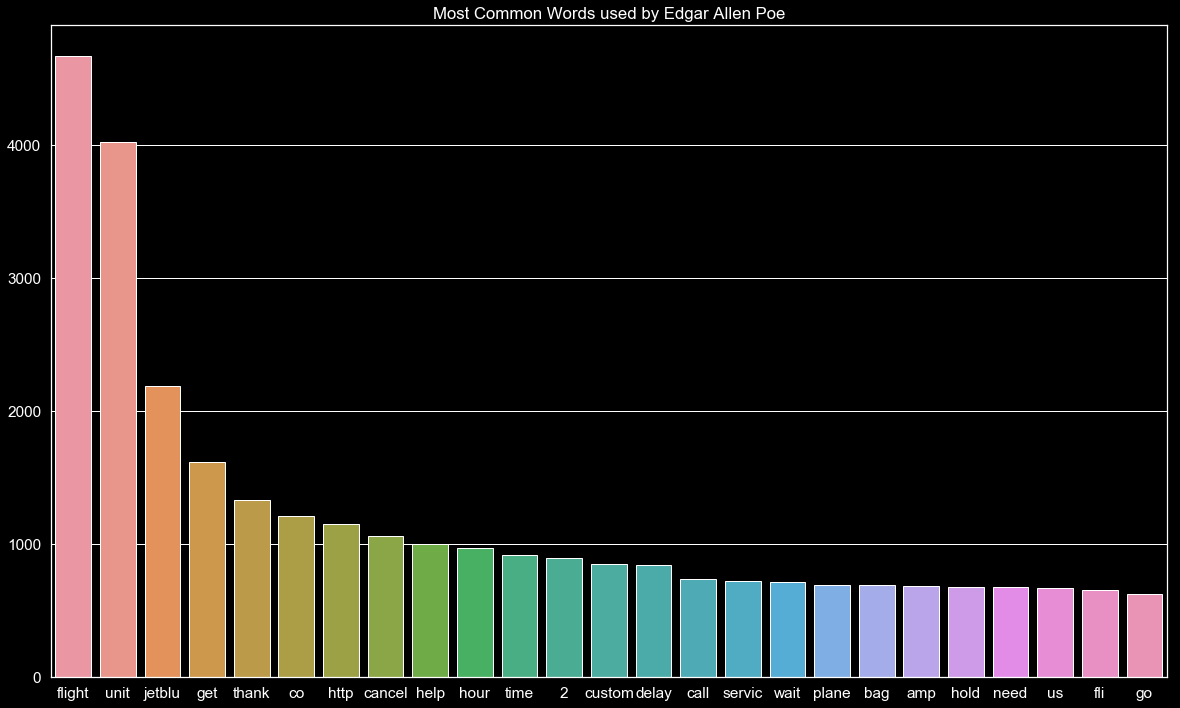

In [256]:
import seaborn as sns #affichage graphique
eap_common_words = [word[0] for word in counts.most_common(25)]
eap_common_counts = [word[1] for word in counts.most_common(25)]

plt.style.use('dark_background')
plt.figure(figsize=(20,12))

sns.barplot(x=eap_common_words, y=eap_common_counts)
plt.title('Most Common Words used by Edgar Allen Poe')

In [257]:
str_new_clean_words = ".".join(new_clean_words)
str_new_clean_words

'dhepburn.said.plus.v.ad.commerci.experience.tacky.today.must.mean.need.take.anoth.trip.realli.aggress.blast.obnoxi.entertainment.guest.face.amp.littl.recours.realli.big.bad.thing.serious.would.pay.30.flight.seat.playing.realli.onli.bad.thing.fli.va.yes.near.everi.time.fli.vx.ear.worm.go.away.realli.miss.prime.opportun.men.without.hat.parody.https.co.mwpg7grezp.well.amazing.arriv.hour.early.r.good.know.suicid.second.lead.caus.death.among.teen.10.24.lt.3.pretti.graphics.much.better.minim.iconography.great.deal.alreadi.think.2nd.trip.australia.amp.even.gone.1st.trip.yet.p.virginmedia.fli.fabul.seduct.sky.u.take.stress.away.travel.http.co.ahlxhhkiyn.thanks.sfo.pdx.schedul.still.mia.excit.first.cross.countri.flight.lax.mco.v.heard.noth.great.thing.virgin.america.29daystogo.flew.nyc.sfo.last.week.fulli.sit.seat.due.two.larg.gentleman.either.side.help.fli.know.would.amaz.awesome.bos.fll.please.want.fli.onli.whi.first.fare.may.three.time.carrier.seat.avail.select.love.graphic.http.co.ut5grrwa

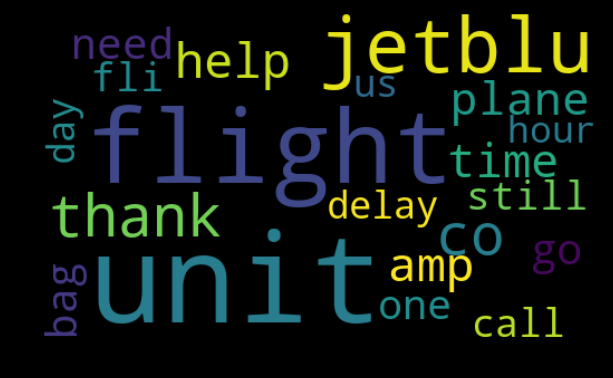

In [258]:
from wordcloud import WordCloud,STOPWORDS
wordcloud = WordCloud(width=500, height=300,
                      random_state=21, max_font_size=110, max_words =20).generate(str_new_clean_words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');
WordCloud()

Remarque : Pour le nettoyge des données certains mots sans importance peuvent être supprimé comme AMP,co,us...

# Analyse de notre Target 

Text(0.5,1,'Count of Moods')

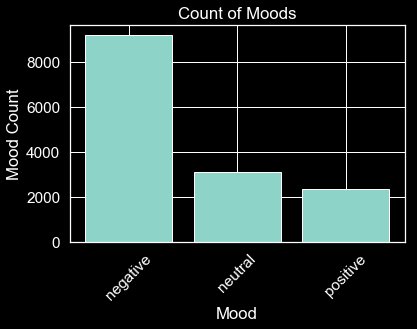

In [259]:
import matplotlib.pyplot as plt #Affichage graphique
Mood_count=Data['airline_sentiment'].value_counts()
Index = [1,2,3]
plt.bar(Index,Mood_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Mood Count')
plt.xlabel('Mood')
plt.title('Count of Moods')

Nos données ne sont pas équilibrées on a tendance à avoir plus de tweets négatifs par rapport aux tweets neutres et positifs.

In [260]:
Data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

On peut pousser l'analyse plus loin et regarder la fréquence des tweets postifs, négatifs et neutres pour chaque compagnie.

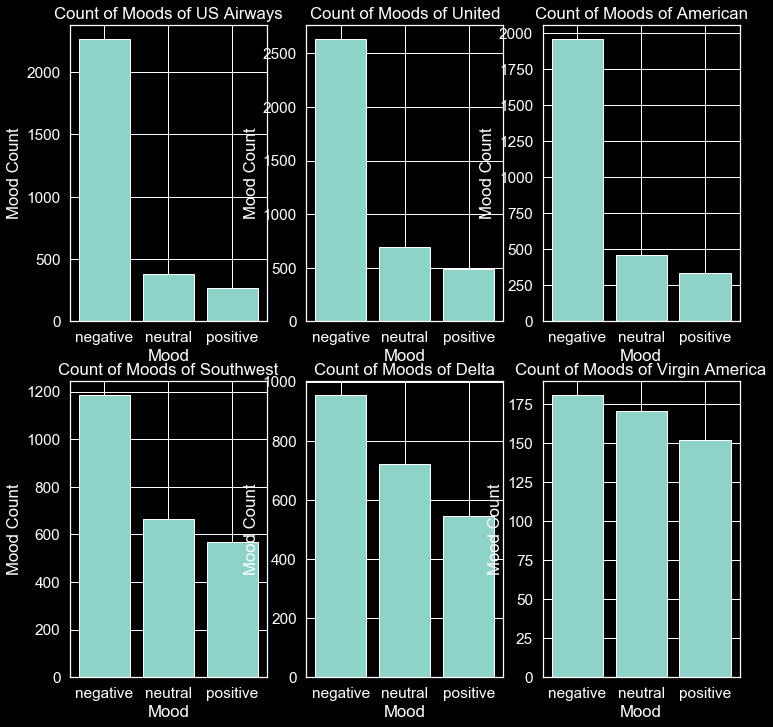

In [261]:
def plot_sub_sentiment(Airline):
    df=Data[Data['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

Virgin America fait partie de la compagnie où la fréquence des tweets postifs, négatifs et neutres sont les plus équilibrés.

US Airways fait partie de la compagnie où la fréquence des tweets postifs, négatifs et neutres sont les plus instables.

# Transformer mots en vecteur (Bag of word)

On va utiliser les 200 mots les plus fréquents avec la librairie "heap"

In [262]:
import heapq
most_freq = heapq.nlargest(200, counts, key=counts.get)
most_freq

['flight',
 'unit',
 'jetblu',
 'get',
 'thank',
 'co',
 'http',
 'cancel',
 'help',
 'hour',
 'time',
 '2',
 'custom',
 'delay',
 'call',
 'servic',
 'wait',
 'plane',
 'bag',
 'amp',
 'hold',
 'need',
 'us',
 'fli',
 'go',
 'one',
 'still',
 'whi',
 'tri',
 'would',
 'gate',
 'back',
 'book',
 'v',
 'pleas',
 'day',
 'make',
 'got',
 'check',
 'seat',
 'phone',
 'like',
 'ani',
 'today',
 'late',
 '3',
 'chang',
 'airlin',
 'miss',
 'agent',
 'know',
 'ticket',
 'take',
 'flightl',
 'work',
 'way',
 'thanks',
 'travel',
 'airport',
 'r',
 '4',
 'guy',
 '1',
 'u',
 'great',
 'want',
 'onli',
 'say',
 'becaus',
 'never',
 'even',
 'weather',
 'board',
 'tomorrow',
 'last',
 'good',
 '5',
 'home',
 'love',
 'look',
 'see',
 'use',
 'minut',
 'min',
 'dm',
 'w',
 'email',
 'let',
 'new',
 'service',
 'sit',
 'told',
 'anoth',
 'first',
 'veri',
 'problem',
 'peopl',
 'number',
 'could',
 'connect',
 'ever',
 'crew',
 'lost',
 'due',
 'yes',
 'worst',
 'realli',
 'rebook',
 'hope',
 'next

Notre most_freq contient les 200 mots les plus utilisés dans le corpus : si un des mots est présent dans la phrase 1 sera ajouté 0 sinon

In [263]:
sentence_vectors = []
for sentence in tweets:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [264]:
sentence_vectors = np.asarray(sentence_vectors)

In [265]:
sentence_vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

Nous avons maintenant notre sac de mots composé de 0 et de 1

In [266]:
from keras.utils.np_utils import to_categorical #Convertit un vecteur de classe (entiers) en matrice de classe binaire.
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y_train_le = le.fit_transform(Data.airline_sentiment)
y_train_oh = to_categorical(y_train_le)

print('"{}" is converted into {}'.format(Data.airline_sentiment[4], y_train_le[4]))
print('"{}" is converted into {}'.format(y_train_le[4], y_train_oh[4]))

"negative" is converted into 0
"0" is converted into [1. 0. 0.]


Negative : 0 donne [1.0.0]

Neutre : 1 donne [0.1.0]

Positif : 2 donne [0.0.1]

# Séparation des données

In [267]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(sentence_vectors, y_train_oh, test_size=0.1, random_state = 1)

In [268]:
y_valid.shape[0]

1464

In [269]:
assert x_test.shape[0] == y_test.shape[0]
assert X_train.shape[0] == Y_test.shape[0]

print(" taille de notre données de validation", x_valid.shape)

 taille de notre données de validation (1464, 200)


# Création de modèle Random Forest

In [270]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [271]:
#import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
y_predict_rf = model_rf.predict(x_test)
cf = confusion_matrix(y_valid.argmax(axis=1), y_predict_rf.argmax(axis=1))
print(cf)
print("accuracy score", accuracy_score(y_test,y_predict_rf))

[[827  76  29]
 [177 100  25]
 [ 95  32 103]]
accuracy score 0.6557377049180327


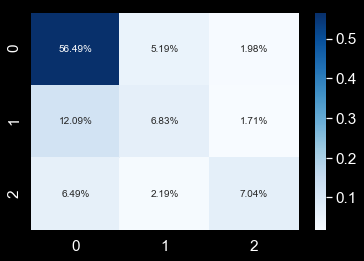

In [272]:
sns.heatmap(cf/np.sum(cf), annot=True,fmt='.2%', cmap='Blues')

In [273]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_rf))

             precision    recall  f1-score   support

          0       0.78      0.81      0.80       932
          1       0.48      0.33      0.39       302
          2       0.66      0.45      0.53       230

avg / total       0.70      0.66      0.67      1464



# Création du modéle de réseau de neurone

In [282]:
from keras import models
from keras import layers
from keras import regularizers

base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(200,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                12864     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 195       
Total params: 17,219
Trainable params: 17,219
Non-trainable params: 0
_________________________________________________________________


In [283]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , Y_train
                       , epochs= 20
                       , batch_size= 512
                       , validation_data=(x_valid, y_valid)
                       , verbose=0)
    
    return history

In [284]:
base_history = deep_model(base_model)

In [285]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, 20 + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

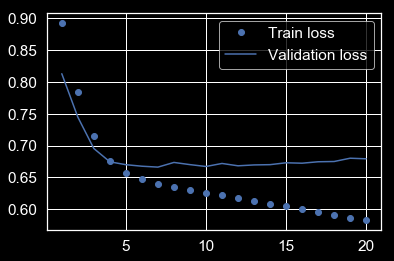

In [286]:
eval_metric(base_history, 'loss') 

Notre fonction de perte et notre fonction de validation est ni trop proche, ni trop éloignée. On a pas de surapprentissage ou de surapprentissage des données.

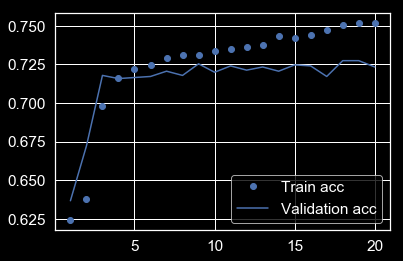

In [287]:
eval_metric(base_history, 'acc')

In [288]:
def test_model(model):
    results = model.evaluate(x_test, y_test) 
    return results

In [289]:
base_results = test_model(base_model)
print('/n')
print('Test accuracy of baseline model: {0:.2f}%'.format(base_results[1]*100))

1464/1464 [==============================] - 0s 16us/step
/n
Test accuracy of baseline model: 72.34%
